# Gaudi Vignette: Analyzing Mouse Olfactory Bulb
This notebook guides you through using the Gaudi framework for spatial transcriptomics data analysis, focusing on the mouse olfactory bulb. Ensure the following files are in your working directory:

* mouse_olfactory_bulb.ipynb
* config.py
* mouse_olfactory_bulb.h5ad

## Setup
We start by setting up our environment, loading the necessary modules, and preparing the data for analysis:


In [ ]:
# Suppress unnecessary warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# Import Scanpy for handling single-cell data
import scanpy as sc

# Import configuration parser and the core Gaudi object from the Gaudi package
from gaudi.tools.config import GaudiArgumentParser
from gaudi.core import GaudiObject

# Load the configuration from the JSON file and read the dataset
config_path = "config.json"
config = GaudiArgumentParser(config_path=config_path).parse_args(known_only=True)
adata = sc.read_h5ad(config.adata_path)


**Note on Data Handling**:

GaudiArgumentParser configures the experiment parameters from config.json. During each experiment run, as defined in the config, results are saved in gaudi_experiments/[dataset_name]/[experiment_name]. After the first run, some processed files in this directory will be auto-loaded to optimize subsequent analyses, whereas others, such as figures and trained models, may be overwritten if they exist.

## Instantiate the GaudiObject

With our configuration and dataset loaded, we can now create an instance of the GaudiObject. This core object manages the analysis based on the configurations provided. It orchestrates the entire data processing and analysis workflow. The following step initializes the framework for analyzing the data, setting the stage for any subsequent analysis tasks you wish to perform.

In [ ]:
# Create an instance of GaudiObject with the loaded data and configuration
gaudi_obj = GaudiObject(adata, config=config)

Processing...
INFO:root:Starting quality control and preprocessing of anndata...
INFO:root:#Cells before filtering: 19109
INFO:root:#Genes before filtering: 27106



No multilevel spatial graph found for sample mouse_olfactory_bulb, processing initial data...


INFO:root:#Cells after filtering: 19108
INFO:root:#Genes after filtering: 16422
INFO:root:Normalizing data...
INFO:root:Performing PCA...
INFO:root:Preprocessing completed.
INFO:root:anndata object X matrix is now log normalized
INFO:root:anndata object original counts and normalized counts are stored in adata.layers['counts'] and adata.layers['log_normalized'] respectively
INFO:root:Graph average degree: 15.04
INFO:root:Starting optics clustering with configuration: {'min_samples': 7, 'min_cluster_size': 7, 'xi': 1e-05, 'max_eps': 300}
INFO:root:Done with optics clustering. Number of clusters found: 826
INFO:root:Extending the detection...
INFO:root:Starting optics clustering with configuration: {'min_samples': 5, 'min_cluster_size': 5, 'xi': 0.01, 'max_eps': 70}
INFO:root:Done with optics clustering. Number of clusters found: 666
INFO:root:Starting optics clustering with configuration: {'min_samples': 5, 'min_cluster_size': 5, 'xi': 0.01, 'max_eps': 70}
INFO:root:Done with optics clu

### Key Data Components of the GaudiObject

The 'GaudiObject' contains several main data components that are crucial for understanding the data structure and navigating the analysis:

* Perspectives: This attribute contains AnnData objects that represent various features created for different hierarchical levels of the data. For instance, 'gaudi_obj.perspectives['mean'][1]' holds an AnnData object with information about different variations of the mean gene expression within the communities (level 1).

* Labels: This is a dictionary that stores all the labels for each hierarchical level. For example, 'gaudi_obj.labels[1]' contains labels relevant to the community level, facilitating targeted analyses based on these labels.

* Sample: This attribute provides detailed processed information gathered during the instantiation of the GaudiObject. It includes refined data and metadata essential for advanced analyses. More information about what sample holds can be found in the function's description in the documentation.

These components are designed to give a structured approach to accessing and analyzing the data.

## Generate Community-Level Representations

In this step, we use Gaudi's learning procedures to generate community-level representations. This method allows customization of Gaudi's neural network model through various parameters defined in the configuration file. Adjusting these parameters lets you tailor the model to better fit the data characteristics and analysis goals. While we demonstrate a few key parameters below, additional ones are available and can be tailored to enhance model performance as you see fit.

In [ ]:
# Generate representations
gaudi_obj.generate_representations(
    train=config.train,
    epochs=config.epochs,
    device=config.device,
    hidden_dim=config.hidden_dim,
    output_dim=config.output_dim,
)


  0%|          | 1/300 [00:04<20:20,  4.08s/it]

Loss: 4.4202


  4%|▎         | 11/300 [00:43<19:06,  3.97s/it]

Loss: 1.7827


  7%|▋         | 21/300 [01:25<19:55,  4.29s/it]

Loss: 0.7276


 10%|█         | 31/300 [02:08<19:17,  4.30s/it]

Loss: 0.2764


 14%|█▎        | 41/300 [02:51<17:57,  4.16s/it]

Loss: 0.1217


 17%|█▋        | 51/300 [03:30<16:21,  3.94s/it]

Loss: 0.0890


 20%|██        | 61/300 [04:12<16:34,  4.16s/it]

Loss: 0.0725


 24%|██▎       | 71/300 [04:53<15:49,  4.15s/it]

Loss: 0.0573


 27%|██▋       | 81/300 [05:35<15:15,  4.18s/it]

Loss: 0.0558


 30%|███       | 91/300 [06:14<13:27,  3.87s/it]

Loss: 0.0386


 34%|███▎      | 101/300 [06:53<12:57,  3.91s/it]

Loss: 0.0495


 36%|███▋      | 109/300 [07:26<13:22,  4.20s/it]

Epoch 00109: reducing learning rate of group 0 to 1.0000e-05.


 37%|███▋      | 111/300 [07:34<13:09,  4.18s/it]

Loss: 0.0303


 40%|████      | 121/300 [08:17<12:30,  4.19s/it]

Loss: 0.0307


 43%|████▎     | 128/300 [08:45<11:50,  4.13s/it]

Epoch 00128: reducing learning rate of group 0 to 1.0000e-06.


 44%|████▎     | 131/300 [08:58<11:30,  4.08s/it]

Loss: 0.0254


 46%|████▋     | 139/300 [09:29<10:25,  3.88s/it]

Epoch 00139: reducing learning rate of group 0 to 1.0000e-07.


 47%|████▋     | 141/300 [09:37<10:33,  3.98s/it]

Loss: 0.0260


 50%|█████     | 150/300 [10:14<10:24,  4.16s/it]

Epoch 00150: reducing learning rate of group 0 to 1.0000e-08.


 50%|█████     | 151/300 [10:18<10:20,  4.17s/it]

Loss: 0.0513


 54%|█████▎    | 161/300 [11:00<09:59,  4.31s/it]

Loss: 0.0198


 57%|█████▋    | 171/300 [11:43<09:06,  4.24s/it]

Loss: 0.0313


 60%|██████    | 181/300 [12:22<07:52,  3.97s/it]

Loss: 0.0322


 64%|██████▎   | 191/300 [13:01<07:03,  3.89s/it]

Loss: 0.0259


 67%|██████▋   | 201/300 [13:43<07:01,  4.26s/it]

Loss: 0.0342


 70%|███████   | 211/300 [14:26<06:16,  4.23s/it]

Loss: 0.0322


 74%|███████▎  | 221/300 [15:07<05:23,  4.09s/it]

Loss: 0.0279


 77%|███████▋  | 231/300 [15:46<04:25,  3.85s/it]

Loss: 0.0275


 80%|████████  | 241/300 [16:28<04:05,  4.16s/it]

Loss: 0.0281


 84%|████████▎ | 251/300 [17:10<03:27,  4.22s/it]

Loss: 0.0286


 87%|████████▋ | 261/300 [17:51<02:38,  4.07s/it]

Loss: 0.0519


 90%|█████████ | 271/300 [18:31<01:54,  3.95s/it]

Loss: 0.0356


 94%|█████████▎| 281/300 [19:10<01:13,  3.88s/it]

Loss: 0.0291


 97%|█████████▋| 291/300 [19:52<00:37,  4.18s/it]

Loss: 0.0244


100%|██████████| 300/300 [20:30<00:00,  4.10s/it]


## Generate Labels and Visualization


We'll begin our analysis at the community level (level 1).



 ### Label Generation for Communities

First, we generate labels for the communities using the Leiden clustering algorithm. After labeling the communities, we visualize them to assess the clustering and the spatial distribution of these labels.



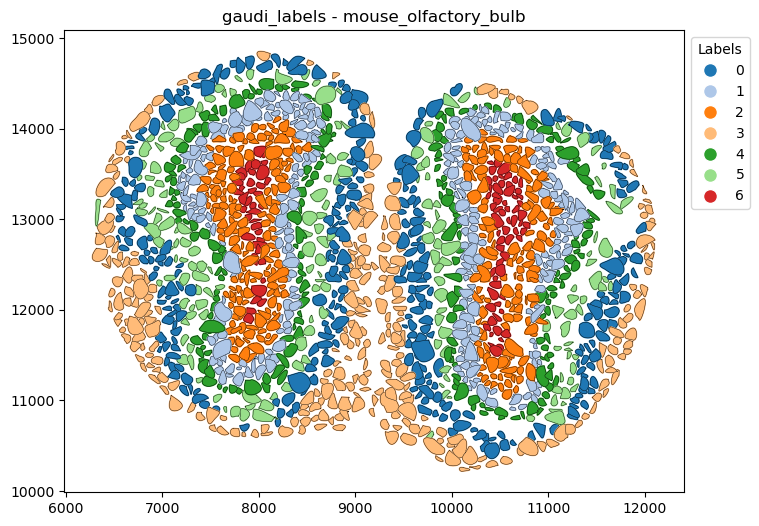

In [ ]:
# Generate labels for communities using the learned representations
gaudi_obj.generate_labels(level=1, clustering_method='leiden', n_neighbors=250, resolution=0.55, neighbors_metric='cosine')

# Visualize the communities with labels
gaudi_obj.plot_communities(color_by='gaudi_labels', size=1, invert_yaxis=False)


### Label Generation at the Cell Level

Although not the primary focus of Gaudi, the learning procedure also generates embeddings at the cell level, which can be useful for tasks such as domain detection, with lower dependency on the community detection mechanism.

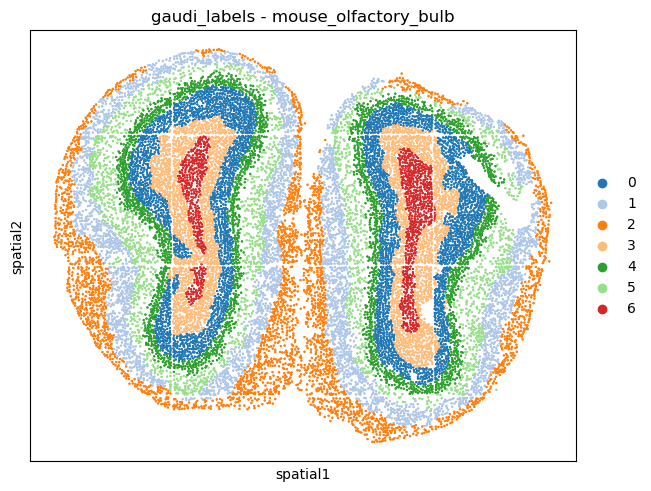

In [ ]:
# Generate labels for cells using the learned representations
gaudi_obj.generate_labels(level=0, clustering_method='leiden', n_neighbors=500, resolution=0.35, neighbors_metric='cosine')

# Plot the cells with their respective labels
gaudi_obj.plot_dots(level=0, color_by='gaudi_labels', invert_yaxis=True, size=1.5, format='pdf')


**Note:**

 Actions performed at the community level are trivially faster and more robust due to the aggregated nature of the data. This aggregation simplifies the complexity seen at the cellular level, enhancing the speed and robustness of the analysis.

## Statistical Comparison Analysis at Community Level
This segment focuses on identifying genes that are differentially expressed across community types (defined by Gaudi's labels) by using the mean of log-normalized gene expressions. This statistical analysis helps pinpoint significant variations in gene expression, providing insights into functional differences across communitie

In this comparison we explictly define some of the parameters:

* labels_name: 'gaudi_labels' — the default labels name for Gaudi's labels used for grouping the data.
* min_counts: Minimum count of observations per group required for inclusion in the analysis.
* level: Data hierarchy level (1 for communities).
* data_type: 'mean' — type of data aggregation used.
* layer: 'log_normalized_based' — specific data layer used for analysis.

Additional parameters such as 'min_fold_change', 'min_diff_pct', and others are set to their default values in this example. You can find detailed descriptions and modify these parameters by referring to the function's documentation.

The compare function conducts the statistical tests and filters the results based on it's defined parameters. Following this, we visualize the results using a dot plot to highlight the differential expression across community types.

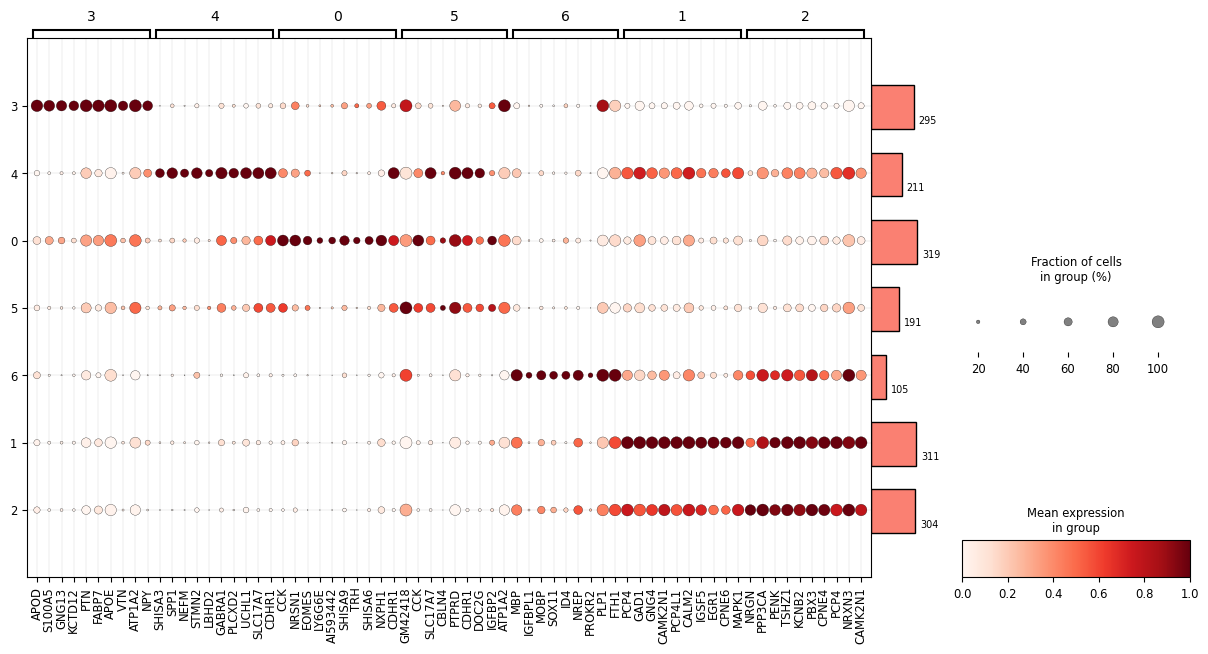

In [ ]:
labels_name = 'gaudi_labels'
min_counts = 30

level = 1
data_type = 'mean'
layer = 'log_normalized_based'

figsize = (15, 7)
dendrogram = True
largest_dot = 75

# Perform the statistical comparison to find differentially expressed genes at the community level
non_nan_values_level_1, subsets_dict_level_1 = gaudi_obj.compare(
    level=level, 
    groupby=labels_name, 
    data_type=data_type
)

# Visualize the differential expression using a dot plot
gaudi_obj.plot_dotplot(
    data_type=data_type, 
    level=level, 
    var_names=subsets_dict_level_1, 
    layer=layer, 
    figsize=figsize, 
    groupby=labels_name, 
    dendrogram=dendrogram, 
    min_counts=min_counts, 
    largest_dot=largest_dot
)

## Cell-Level Statistical Comparison

We extend our analysis to cells using the log-normalized gene expressions, identifying differentially expressed genes by comparing across cell types labeled with 'gaudi_labels'.

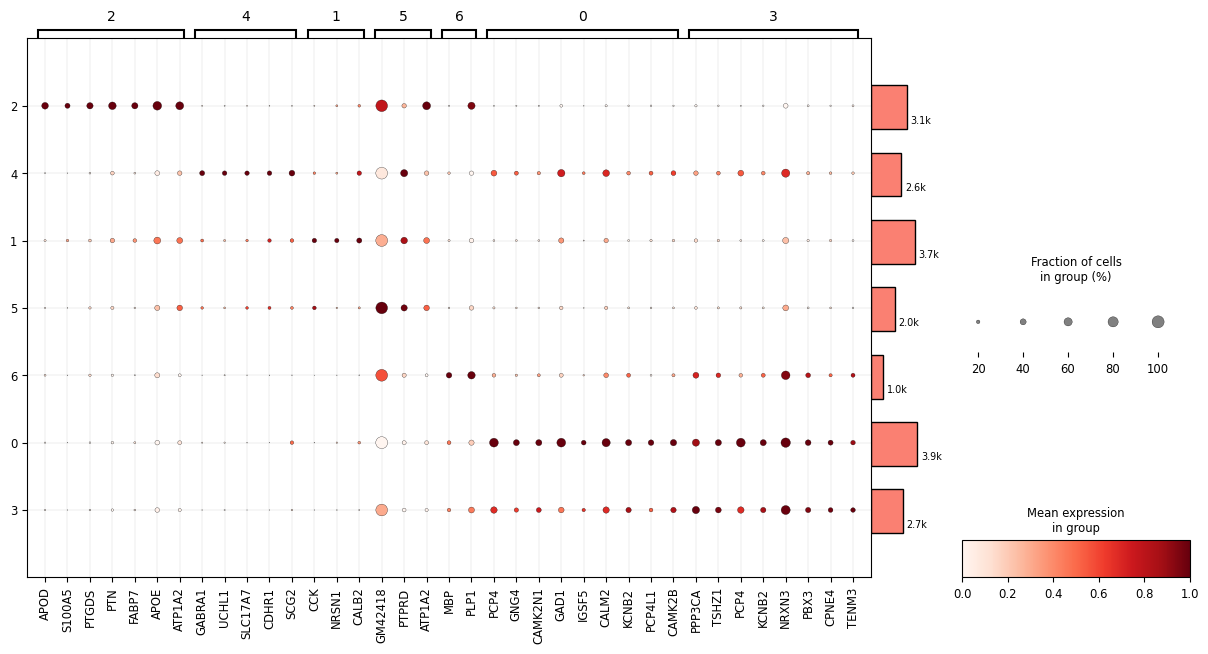

In [ ]:
labels_name = 'gaudi_labels'
min_counts = 30

data_type = 'mean'
level = 0

layer = 'log_normalized_based'

figsize = (15, 7)
dendrogram = True
largest_dot = 75

# Perform the statistical comparison at the cell level
non_nan_values_level_0, subsets_dict_level_0 = gaudi_obj.compare(
    level=0, 
    groupby=labels_name, 
    data_type=data_type
)

# Visualize the differential expression at the cell level
gaudi_obj.plot_dotplot(
    data_type=data_type, 
    level=level, 
    var_names=subsets_dict_level_0, 
    layer=layer, 
    figsize=figsize, 
    groupby=labels_name, 
    dendrogram=dendrogram, 
    min_counts=min_counts, 
    largest_dot=largest_dot
)


## Exploring Cell Type Composition Across Community Types


Using Gaudi's hierarchical analysis capabilities, we explore the composition of cell types (here, derived from clustering results at the cell level but can be use any label group which can be found at gaudi_obj.labels) within different community types. This analysis helps in understanding how cellular compositions vary across defined community structures, providing insights into the microenvironments within the spatial transcriptomics dataset.

### Visualizing Cell Type Composition
The 'plot_composition' function provides a global view of how various cell clusters are distributed within each community, illustrating the diversity and organizational complexity of cells. This visualization will enable us to see the distribution and prevalence of different cell types within each community, offering insights into the cellular heterogeneity and its organizational structure within the spatial transcriptomics.

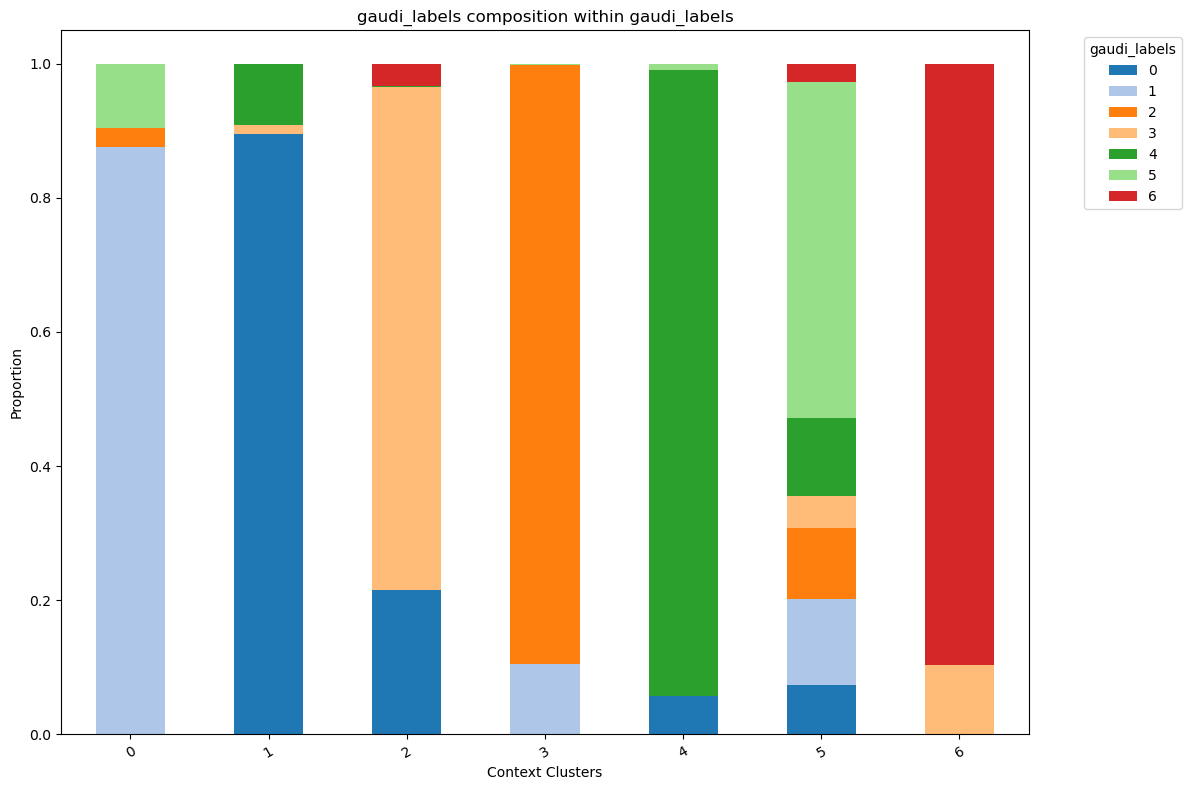

In [ ]:
# Parameters for composition analysis
groupby = 'gaudi_labels'  # Labels defining the community types
groupby_level = 1  # Community level
composition_group = 'gaudi_labels'  # Labels used for cell clustering
composition_group_level = 0  # Cell level

# Plotting the composition of cell types across community types
gaudi_obj.plot_composition(groupby, composition_group, groupby_level, composition_group_level)


### Statistical Analysis of Cell Type Composition Distribution
Building on our hierarchical analysis, we now conduct statistical tests to explore the variations in cell type compositions across different communities.

This step aims to identify significant differences in composition that might signify underlying biological processes or variations in cellular communities.


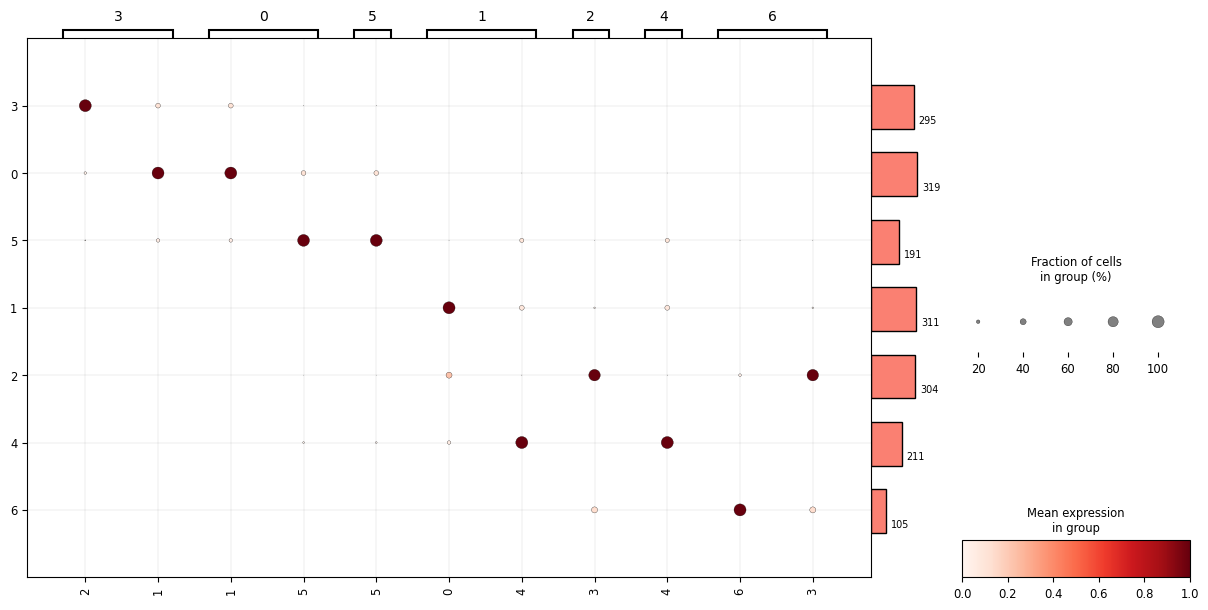

In [ ]:
labels_name = 'gaudi_labels'
min_counts = 30

data_type = 'composition'
level = 1

layer = None

figsize = (15, 7)
dendrogram = True
largest_dot = 75

# Perform statistical comparison on the cell type composition across community types
non_nan_values_level_1_composition, subsets_dict_level_1_composition = gaudi_obj.compare(
    level=level, 
    groupby=labels_name, 
    data_type=data_type
)

# Visualize the differences in cell type composition
gaudi_obj.plot_dotplot(
    data_type=data_type, 
    level=level, 
    var_names=subsets_dict_level_1_composition, 
    layer=layer, 
    figsize=figsize, 
    groupby=labels_name, 
    dendrogram=dendrogram, 
    min_counts=min_counts, 
    largest_dot=largest_dot
)
